In [14]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns

In [15]:
df=pd.read_csv('../data/raw/fear_greed_index.csv')

In [16]:
df.tail()

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [18]:
print(len(df['date'].unique()))
print(df['classification'].unique())
print(df['value'].unique())
print(len(df['timestamp'].unique()))

2644
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']
[30 15 40 24 11  8 36 44 54 31 42 35 55 71 67 74 63 39 33 37 41 38 47 56
 59 32 29 28 18 12 16 22 17 19 20 21 23 26 25 64 61 52 62 53 27 34 43 46
 49 48 14 13 51  9 10 65 69 58 50 57 60 68 66 76 75 78 77 70 73 80 84 83
 82 81 87 95 92 79 72 45  5 90 88 86 89 91 94 93  7  6]
2644


In [19]:
df['classification'].value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [20]:
# Step 1: Converting date column and explore temporal coverage
df['date'] = pd.to_datetime(df['date'])

print("=== TEMPORAL COVERAGE ===")
print(f"Dataset spans from: {df['date'].min()}")
print(f"Dataset spans to: {df['date'].max()}")
print(f"Total days covered: {(df['date'].max() - df['date'].min()).days + 1}")
print(f"Actual records: {len(df)}")
print(f"Data completeness: {len(df) / ((df['date'].max() - df['date'].min()).days + 1) * 100:.1f}%")

=== TEMPORAL COVERAGE ===
Dataset spans from: 2018-02-01 00:00:00
Dataset spans to: 2025-05-02 00:00:00
Total days covered: 2648
Actual records: 2644
Data completeness: 99.8%


In [21]:
print(f"\n=== SENTIMENT DISTRIBUTION ===")
sentiment_counts = df['classification'].value_counts()
print(sentiment_counts)


=== SENTIMENT DISTRIBUTION ===
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [22]:
print(f"\n=== SENTIMENT PERCENTAGES ===")
sentiment_pct = (df['classification'].value_counts() / len(df) * 100).round(1)
for sentiment, pct in sentiment_pct.items():
    print(f"{sentiment}: {pct}%")


=== SENTIMENT PERCENTAGES ===
Fear: 29.5%
Greed: 23.9%
Extreme Fear: 19.2%
Neutral: 15.0%
Extreme Greed: 12.3%


In [23]:
print(f"\n=== VALUE STATISTICS ===")
print(df['value'].describe())


=== VALUE STATISTICS ===
count    2644.000000
mean       46.981089
std        21.827680
min         5.000000
25%        28.000000
50%        46.000000
75%        66.000000
max        95.000000
Name: value, dtype: float64


In [24]:
# Step 2: Analyze temporal sentiment patterns
import matplotlib.pyplot as plt

# Create monthly sentiment aggregations
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['YearMonth'] = df['date'].dt.to_period('M')

# Focus on your trading period (2023-2025)
trading_period = df[df['date'] >= '2023-05-01'].copy()

print("=== SENTIMENT DURING YOUR TRADING PERIOD ===")
trading_sentiment = trading_period['classification'].value_counts()
print(trading_sentiment)
print(f"\nTrading period records: {len(trading_period)} days")

# Monthly sentiment trends during trading period
monthly_sentiment = trading_period.groupby(['YearMonth', 'classification']).size().unstack(fill_value=0)

print(f"\n=== RECENT SENTIMENT TRENDS (2023-2025) ===")
print("Average sentiment value by year:")
yearly_avg = trading_period.groupby('Year')['value'].mean().round(1)
print(yearly_avg)

=== SENTIMENT DURING YOUR TRADING PERIOD ===
classification
Greed            295
Neutral          177
Fear             129
Extreme Greed    116
Extreme Fear      15
Name: count, dtype: int64

Trading period records: 732 days

=== RECENT SENTIMENT TRENDS (2023-2025) ===
Average sentiment value by year:
Year
2023    55.7
2024    63.3
2025    48.0
Name: value, dtype: float64


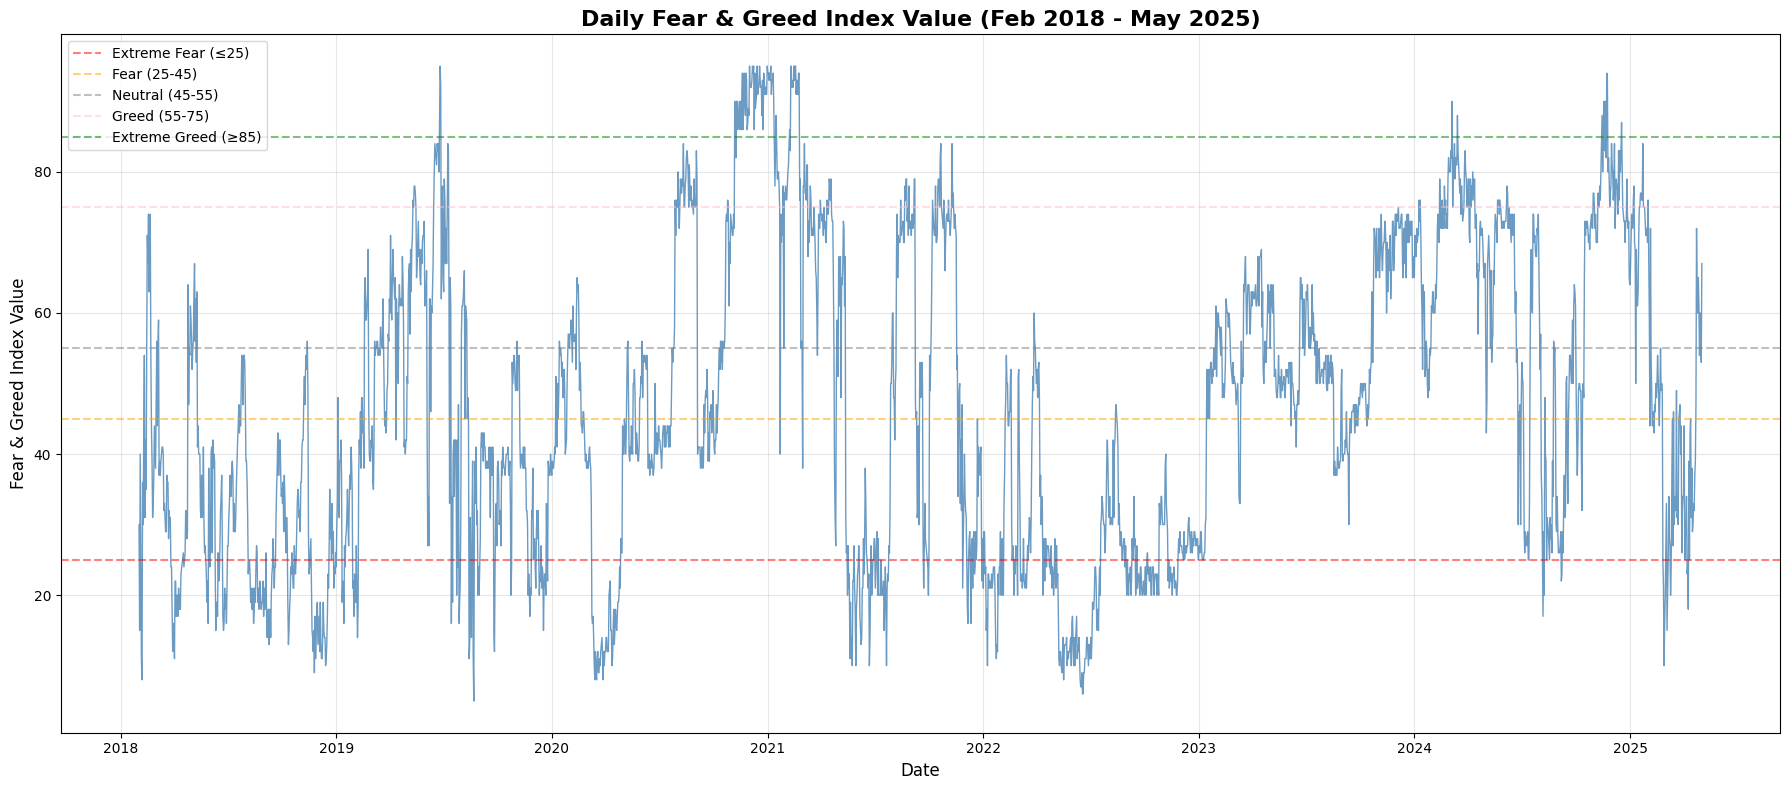

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Daily Fear & Greed Index Value Over Time
plt.figure(figsize=(18, 8))
plt.plot(df['date'], df['value'], color='steelblue', alpha=0.8, linewidth=1)
plt.title('Daily Fear & Greed Index Value (Feb 2018 - May 2025)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fear & Greed Index Value', fontsize=12)
plt.grid(True, alpha=0.3)

# Add horizontal lines for sentiment boundaries
plt.axhline(y=25, color='red', linestyle='--', alpha=0.5, label='Extreme Fear (≤25)')
plt.axhline(y=45, color='orange', linestyle='--', alpha=0.5, label='Fear (25-45)')
plt.axhline(y=55, color='gray', linestyle='--', alpha=0.5, label='Neutral (45-55)')
plt.axhline(y=75, color='pink', linestyle='--', alpha=0.5, label='Greed (55-75)')
plt.axhline(y=85, color='green', linestyle='--', alpha=0.5, label='Extreme Greed (≥85)')

plt.legend()
plt.tight_layout()
plt.show()


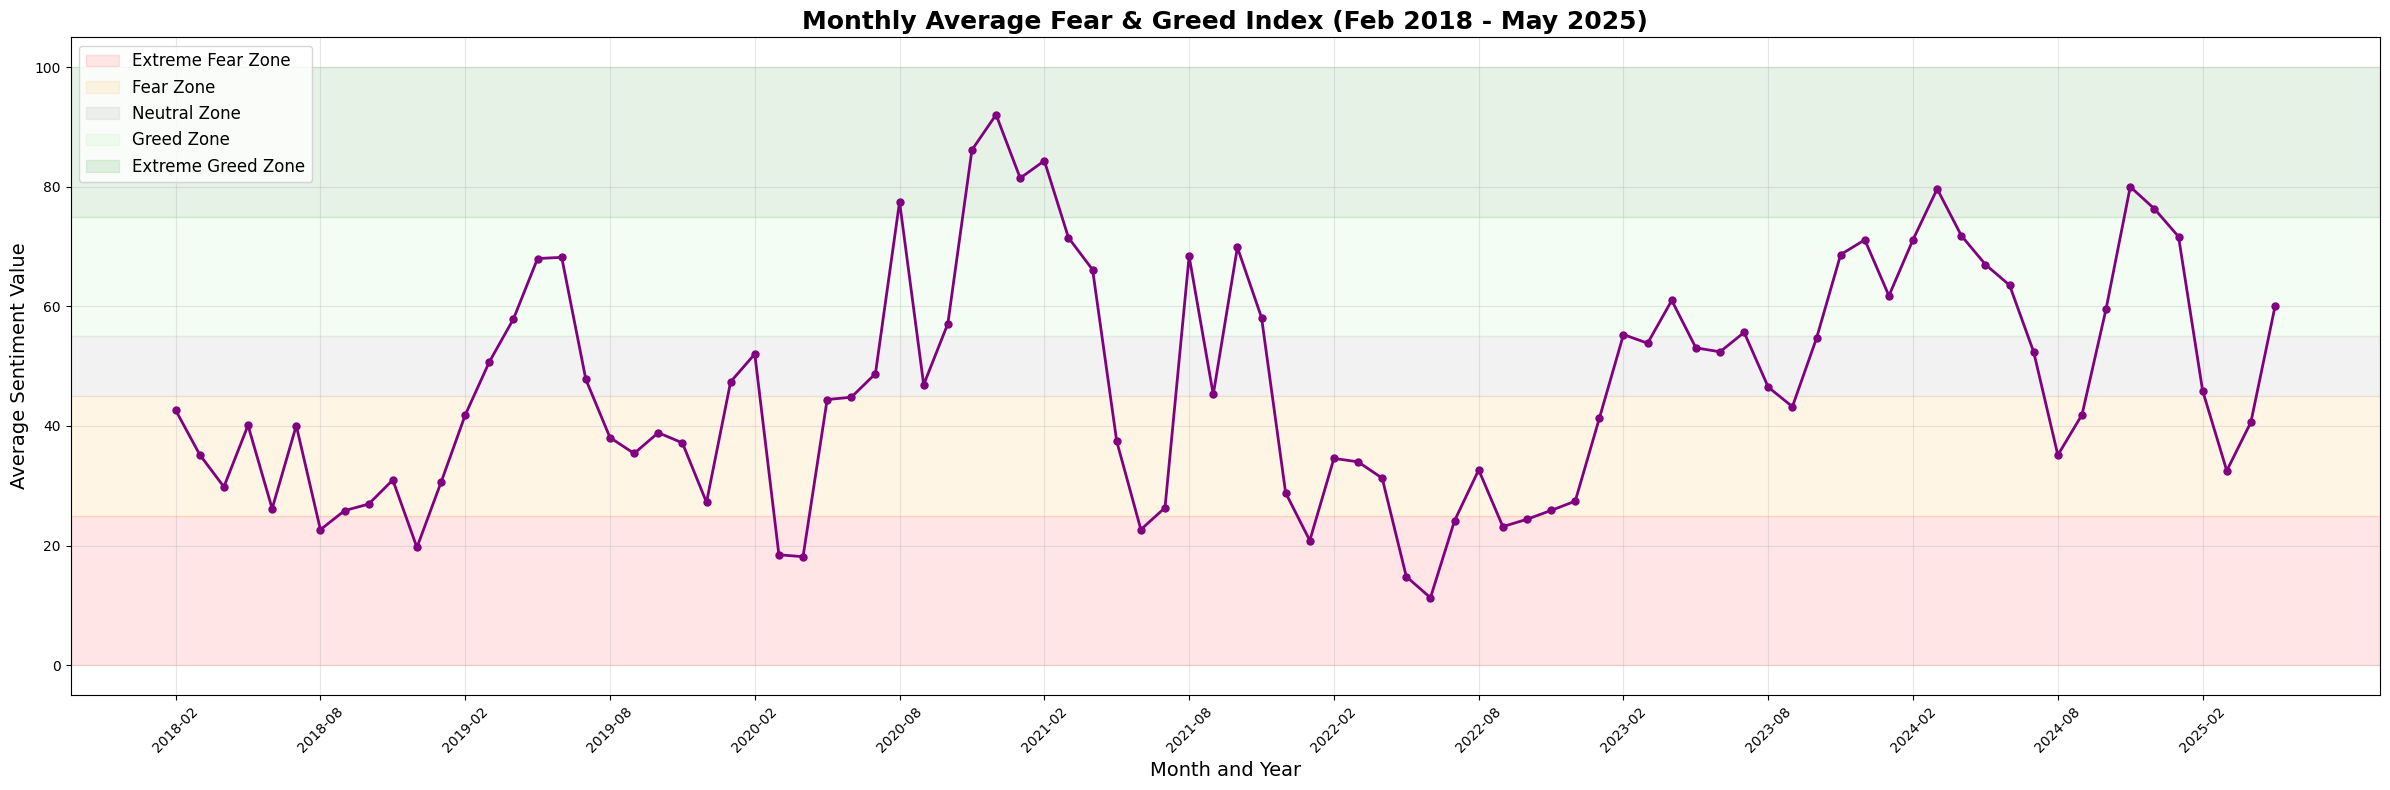

In [29]:
# Monthly Analysis with Much Wider Plot
df['Month'] = df['date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['value'].mean()

plt.figure(figsize=(24, 8))  # Much wider plot
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, 
         marker='o', linewidth=2, markersize=5, color='purple')
plt.title('Monthly Average Fear & Greed Index (Feb 2018 - May 2025)', 
          fontsize=18, fontweight='bold')
plt.xlabel('Month and Year', fontsize=14)
plt.ylabel('Average Sentiment Value', fontsize=14)

# Better x-axis formatting
plt.xticks(rotation=45, fontsize=10)
# Show every 6th month to reduce crowding
tick_positions = range(0, len(monthly_avg), 6)
tick_labels = [monthly_avg.index.astype(str)[i] for i in tick_positions]
plt.xticks(tick_positions, tick_labels)

plt.grid(True, alpha=0.3)

# Add sentiment zone backgrounds
plt.axhspan(0, 25, alpha=0.1, color='red', label='Extreme Fear Zone')
plt.axhspan(25, 45, alpha=0.1, color='orange', label='Fear Zone')
plt.axhspan(45, 55, alpha=0.1, color='gray', label='Neutral Zone')
plt.axhspan(55, 75, alpha=0.1, color='lightgreen', label='Greed Zone')
plt.axhspan(75, 100, alpha=0.1, color='green', label='Extreme Greed Zone')

plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


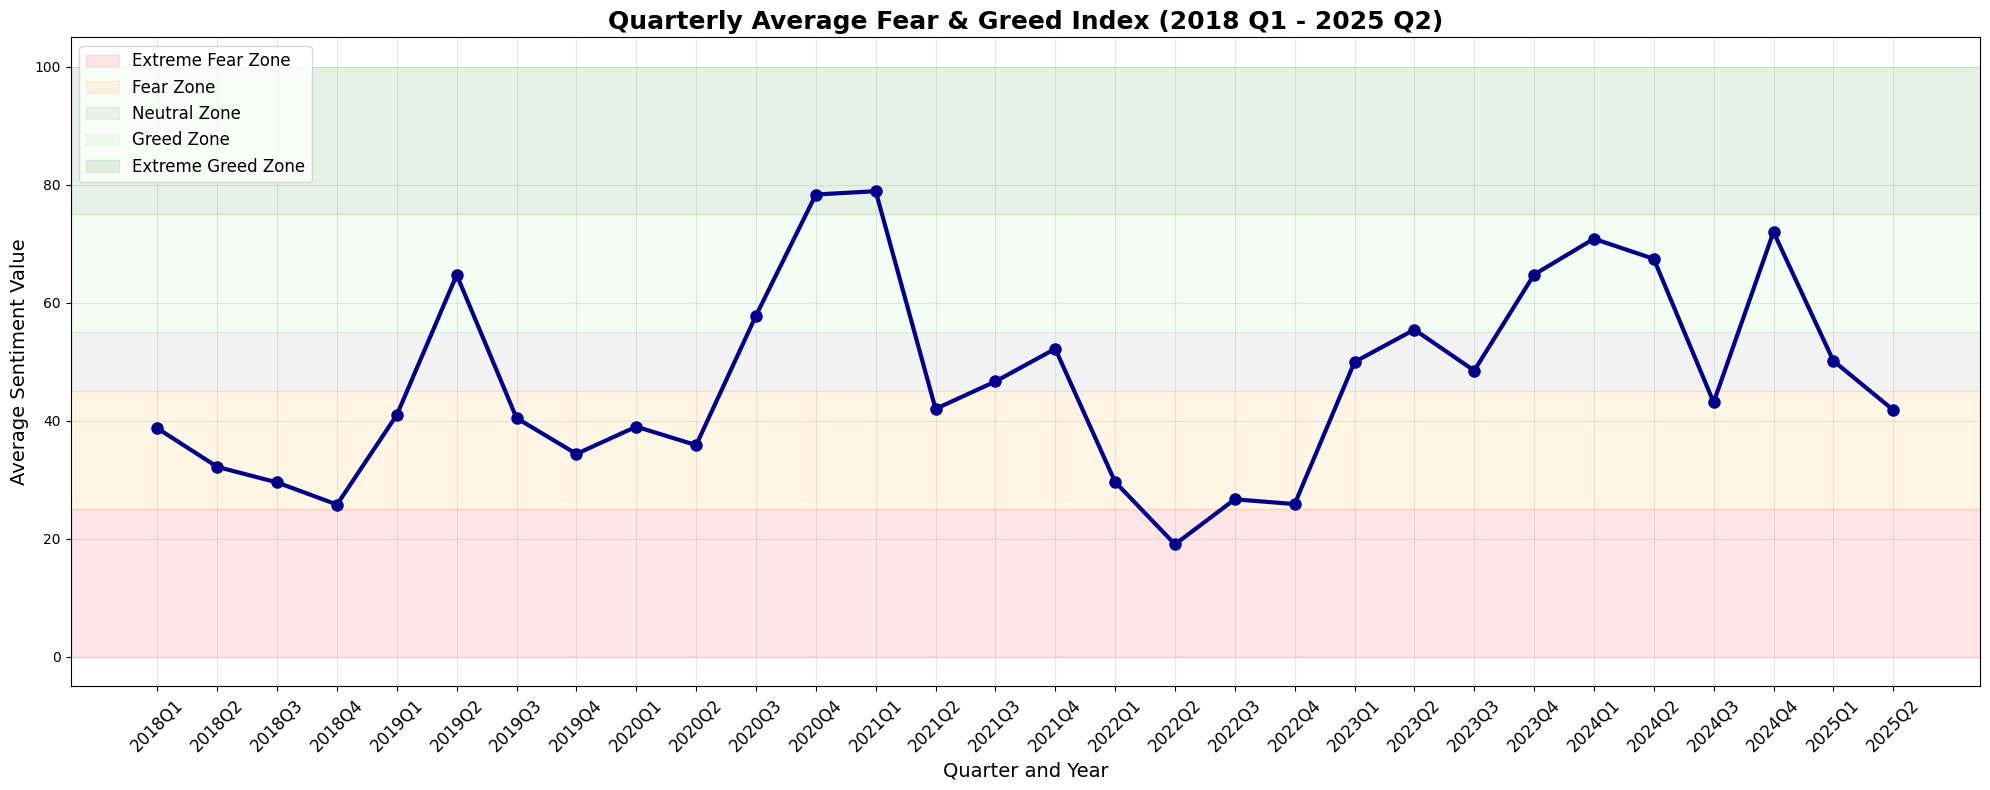

=== QUARTERLY SENTIMENT SUMMARY ===
2018Q1: 38.7 (Fear)
2018Q2: 32.2 (Fear)
2018Q3: 29.6 (Fear)
2018Q4: 25.8 (Fear)
2019Q1: 41.0 (Fear)
2019Q2: 64.7 (Greed)
2019Q3: 40.5 (Fear)
2019Q4: 34.4 (Fear)
2020Q1: 39.0 (Fear)
2020Q2: 35.9 (Fear)
2020Q3: 57.8 (Greed)
2020Q4: 78.4 (Extreme Greed)
2021Q1: 78.9 (Extreme Greed)
2021Q2: 42.0 (Fear)
2021Q3: 46.7 (Neutral)
2021Q4: 52.2 (Neutral)
2022Q1: 29.6 (Fear)
2022Q2: 19.1 (Extreme Fear)
2022Q3: 26.7 (Fear)
2022Q4: 25.9 (Fear)
2023Q1: 50.0 (Neutral)
2023Q2: 55.5 (Greed)
2023Q3: 48.5 (Neutral)
2023Q4: 64.8 (Greed)
2024Q1: 70.9 (Greed)
2024Q2: 67.5 (Greed)
2024Q3: 43.1 (Fear)
2024Q4: 72.0 (Greed)
2025Q1: 50.2 (Neutral)
2025Q2: 41.8 (Fear)


In [30]:
# Quarterly Analysis - Even cleaner view
df['Quarter'] = df['date'].dt.to_period('Q')
quarterly_avg = df.groupby('Quarter')['value'].mean()

plt.figure(figsize=(20, 8))
plt.plot(quarterly_avg.index.astype(str), quarterly_avg.values, 
        marker='o', linewidth=3, markersize=8, color='darkblue')
plt.title('Quarterly Average Fear & Greed Index (2018 Q1 - 2025 Q2)', 
        fontsize=18, fontweight='bold')
plt.xlabel('Quarter and Year', fontsize=14)
plt.ylabel('Average Sentiment Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, alpha=0.3)

# Add sentiment zone backgrounds
plt.axhspan(0, 25, alpha=0.1, color='red', label='Extreme Fear Zone')
plt.axhspan(25, 45, alpha=0.1, color='orange', label='Fear Zone')
plt.axhspan(45, 55, alpha=0.1, color='gray', label='Neutral Zone')
plt.axhspan(55, 75, alpha=0.1, color='lightgreen', label='Greed Zone')
plt.axhspan(75, 100, alpha=0.1, color='green', label='Extreme Greed Zone')

plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Print key quarterly insights
print("=== QUARTERLY SENTIMENT SUMMARY ===")
for quarter, avg_value in quarterly_avg.items():
    if avg_value <= 25:
        sentiment = "Extreme Fear"
    elif avg_value <= 45:
        sentiment = "Fear"
    elif avg_value <= 55:
        sentiment = "Neutral"
    elif avg_value <= 75:
        sentiment = "Greed"
    else:
        sentiment = "Extreme Greed"
    print(f"{quarter}: {avg_value:.1f} ({sentiment})")


In [28]:
# Step 4: Identify Extreme Periods
extreme_fear_periods = df[df['value'] <= 15]['date']
extreme_greed_periods = df[df['value'] >= 85]['date']

print("=== EXTREME MARKET PERIODS ===")
print(f"Extreme Fear days (value ≤ 15): {len(extreme_fear_periods)}")
if len(extreme_fear_periods) > 0:
    print("Notable Extreme Fear periods:")
    for date in extreme_fear_periods.head(10):
        print(f"  - {date.strftime('%Y-%m-%d')}")

print(f"\nExtreme Greed days (value ≥ 85): {len(extreme_greed_periods)}")
if len(extreme_greed_periods) > 0:
    print("Notable Extreme Greed periods:")
    for date in extreme_greed_periods.head(10):
        print(f"  - {date.strftime('%Y-%m-%d')}")

# Market volatility analysis
rolling_std = df.set_index('date')['value'].rolling(window=30).std()
print(f"\nAverage 30-day sentiment volatility: {rolling_std.mean():.2f}")
print(f"Maximum 30-day sentiment volatility: {rolling_std.max():.2f}")


=== EXTREME MARKET PERIODS ===
Extreme Fear days (value ≤ 15): 152
Notable Extreme Fear periods:
  - 2018-02-02
  - 2018-02-05
  - 2018-02-06
  - 2018-03-30
  - 2018-04-02
  - 2018-06-11
  - 2018-06-24
  - 2018-09-06
  - 2018-09-09
  - 2018-09-10

Extreme Greed days (value ≥ 85): 95
Notable Extreme Greed periods:
  - 2019-06-25
  - 2019-06-26
  - 2019-06-27
  - 2020-11-06
  - 2020-11-07
  - 2020-11-09
  - 2020-11-10
  - 2020-11-11
  - 2020-11-12
  - 2020-11-13

Average 30-day sentiment volatility: 8.84
Maximum 30-day sentiment volatility: 23.32
